# Active Learning Tutorial



In [1]:
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def print_digits():
    digits = load_digits()
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

        # label the image with the target value
        ax.text(0, 7, str(digits.target[i]))

    plt.show()


def run(number_of_questions=20):
    X, y = load_digits(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    initial_idx = np.random.choice(range(len(X_train)), size=10, replace=False)

    X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
    X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
    learner = ActiveLearner(
        estimator=RandomForestClassifier(),
        query_strategy=uncertainty_sampling,
        X_training=X_initial, y_training=y_initial
    )
    n_queries = number_of_questions
    accuracy_scores = [learner.score(X_test, y_test)]

    for i in range(n_queries):
        display.clear_output(wait=True)
        query_idx, query_inst = learner.query(X_pool)
        shape = query_inst.shape
        square = int(np.sqrt(shape[1]))
        with plt.style.context('seaborn-white'):
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.title('Digits to label')
            plt.imshow(query_inst.reshape(square, square), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.subplot(1, 2, 2)
            plt.title('Accuracy of your model')
            plt.plot(range(i + 1), accuracy_scores)
            plt.scatter(range(i + 1), accuracy_scores)
            plt.xlabel('number of queries')
            plt.ylabel('accuracy')
            display.display(plt.gcf())
            plt.close('all')

        print("Which digit is this?")
        y_new = np.array([int(input('What is the digit?'))], dtype=int)
        learner.teach(query_inst.reshape(1, -1), y_new)
        X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
        accuracy_scores.append(learner.score(X_test, y_test))


## Exercise 1: MNIST

Run the following code and fill in the asked numbers.

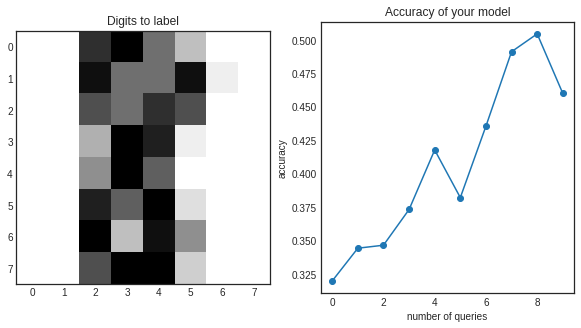

Which digit is this?


What is the digit? 8


In [3]:
run(number_of_questions=10)

## Exercise 2: MNIST with Hints

As we saw in the lecture, it's easier to guess the correct class, if there is an image of a digit.

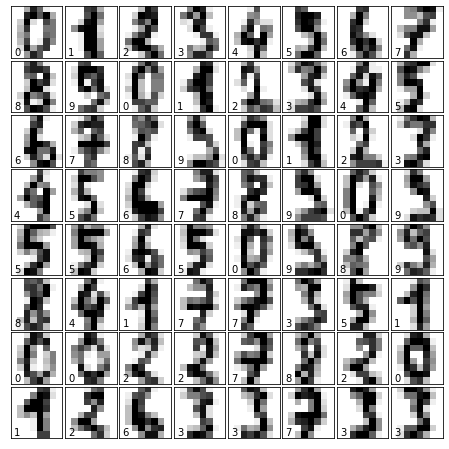

In [12]:
print_digits()

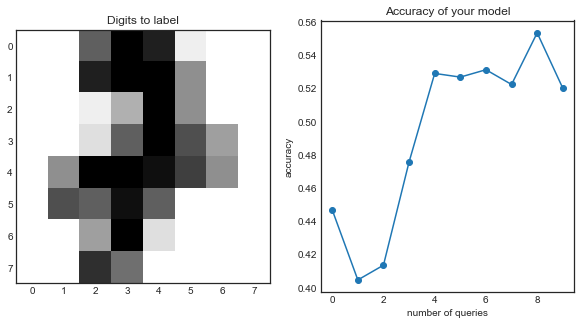

Which digit is this?


In [13]:
run(number_of_questions=10)

# Exercise 3: MNIST with more questions

Try to improve the accuracy of the model by answering more questions. To do this, change the `number_of_questions` variable.